In [4]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from load_data import load_and_preprocess
from gaussian_model import GaussianGenerativeModel
from training import tune_lambda
from evaluation import accuracy, compute_metrics
import numpy as np

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test = load_and_preprocess()
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (1257, 64)
Validation shape: (270, 64)
Test shape: (270, 64)


In [6]:
best_lambda, best_val_acc = tune_lambda(X_train, y_train, X_val, y_val)
print(f"Best λ: {best_lambda}, Validation Accuracy: {best_val_acc:.4f}")


Lambda	Validation Accuracy
---------------------------
0.0001	0.9444
0.0010	0.9444
0.0100	0.9444
0.1000	0.9444
---------------------------
Best λ: 0.0001, Validation Accuracy: 0.9444

Best λ: 0.0001, Validation Accuracy: 0.9444


In [7]:
# Combine train + val
X_train_full = np.vstack([X_train, X_val])
y_train_full = np.hstack([y_train, y_val])

final_model = GaussianGenerativeModel(lambda_reg=best_lambda)
final_model.fit(X_train_full, y_train_full)


In [8]:
y_pred = final_model.predict(X_test)

test_acc = accuracy(y_test, y_pred)
precision, recall, f1, cm = compute_metrics(y_test, y_pred)

print("____> LOOkHere <_____")
print(f"Test Accuracy     : {test_acc:.4f}")
print(f"Macro Precision   : {precision:.4f}")
print(f"Macro Recall      : {recall:.4f}")
print(f"Macro F1-score    : {f1:.4f}")
print("\nConfusion Matrix:\n", cm)


____> LOOkHere <_____
Test Accuracy     : 0.9630
Macro Precision   : 0.9632
Macro Recall      : 0.9627
Macro F1-score    : 0.9625

Confusion Matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  1  1]
 [ 0  0 26  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0]
 [ 0  3  0  0  0  0  0  0 22  1]
 [ 0  1  0  0  0  1  0  1  1 23]]


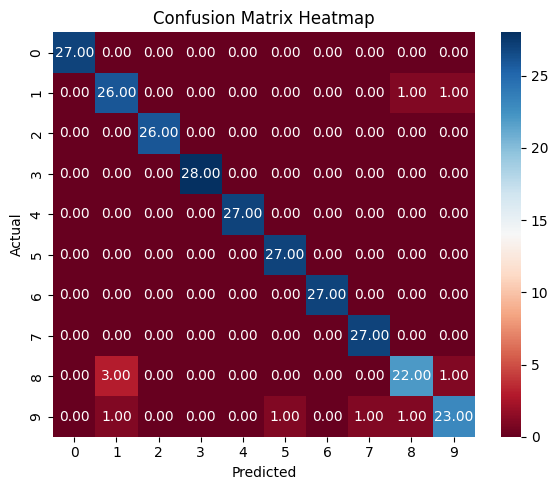

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure array
cm = np.array(cm)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    cbar=True
)

plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
